In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import weather
from scipy import stats
from pylab import *
import seaborn as sns
import datetime

sns.set()
# Data Info
# https://data.vancouver.ca/datacatalogue/crime-data-attributes.htm#X

In [3]:
# Get Crime Data and take out 2018 Data as it skews results
c = pd.read_csv("crime_csv_all_years.csv")
c = c[c['YEAR'] != 2018]
c['my_dates'] = pd.to_datetime(c[['YEAR', 'MONTH', 'DAY']])
c['day_of_week'] = c['my_dates'].dt.weekday_name
c

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,my_dates,day_of_week
0,Break and Enter Residential/Other,2003,12,9,15.0,45.0,1X E 57TH AVE,Sunset,492299.45,5451762.38,2003-12-09,Tuesday
1,Theft of Vehicle,2003,1,11,22.0,0.0,55XX ARGYLE ST,Kensington-Cedar Cottage,494802.88,5453540.96,2003-01-11,Saturday
2,Theft from Vehicle,2003,1,17,21.0,48.0,16XX DAVIE ST,West End,489906.41,5459175.15,2003-01-17,Friday
3,Theft of Vehicle,2003,12,5,17.0,0.0,47XX CULLODEN ST,Kensington-Cedar Cottage,494258.53,5454405.92,2003-12-05,Friday
4,Mischief,2003,9,12,3.0,30.0,31XX E 51ST AVE,Killarney,497055.35,5452244.07,2003-09-12,Friday
5,Theft of Vehicle,2003,11,23,21.0,0.0,47XX DUMFRIES ST,Kensington-Cedar Cottage,494639.97,5454370.24,2003-11-23,Sunday
6,Theft from Vehicle,2003,12,2,17.0,45.0,5XX MAIN ST,Central Business District,492741.41,5458535.19,2003-12-02,Tuesday
7,Theft from Vehicle,2003,5,16,0.0,0.0,5XX MAIN ST,Central Business District,492741.41,5458535.19,2003-05-16,Friday
8,Theft of Bicycle,2003,7,14,22.0,0.0,12XX BIDWELL ST,West End,489721.55,5459197.77,2003-07-14,Monday
9,Theft from Vehicle,2003,7,23,6.0,58.0,5XX KEEFER ST,Strathcona,493205.99,5458520.93,2003-07-23,Wednesday


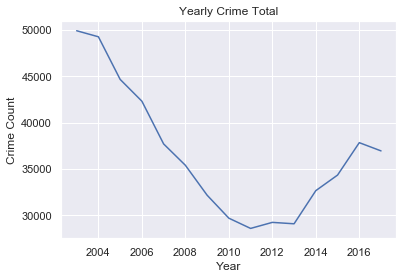

In [3]:
# Yearly crime averages plotted
yearlyCrime = c.groupby(['YEAR']).count()
plt.plot(yearlyCrime.index, yearlyCrime['TYPE'])
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Yearly Crime Total')
plt.savefig('Yearly.png')

In [4]:
# Seperate the crimes by type
bneC = c[c['TYPE'] == "Break and Enter Commercial"] # 36010
bneR = c[c['TYPE'] == "Break and Enter Residential/Other"] # 63362
kill = c[c['TYPE'] == "Homicide"] # 236
mischief = c[c['TYPE'] == "Mischief"] # 76205
offence = c[c['TYPE'] == "Offence Against a Person"] # 57279
theftO = c[c['TYPE'] == "Other Theft"] # 57526
theftFromV = c[c['TYPE'] == "Theft from Vehicle"] # 187232
theftB = c[c['TYPE'] == "Theft of Bicycle"] # 27900
theftV = c[c['TYPE'] == "Theft of Vehicle"]# 39775
injuryCollision = c[c['TYPE'] == "Vehicle Collision or Pedestrian Struck (with Injury)"] # 23444
fatalCollision = c[c['TYPE'] == "Vehicle Collision or Pedestrian Struck (with Fatality)"]# 269

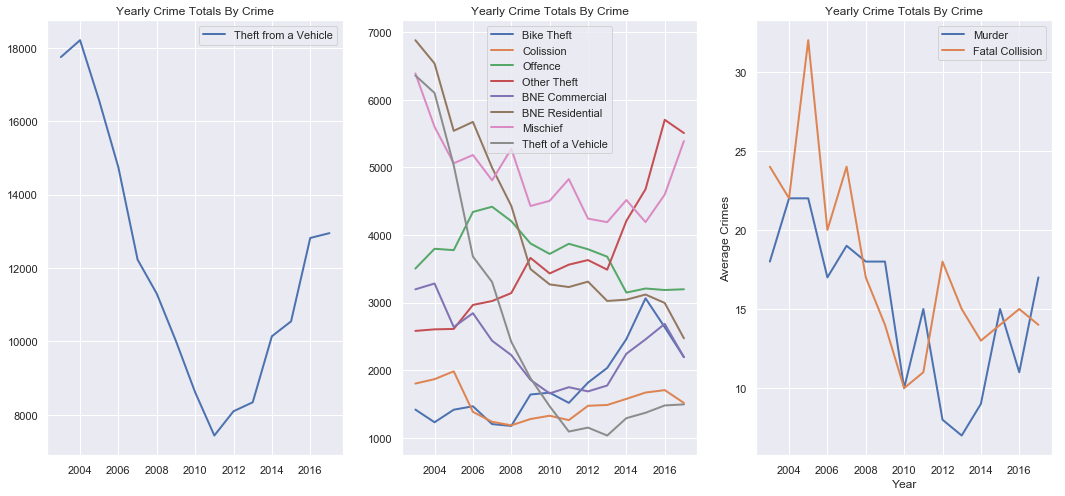

In [5]:
def graph(s, x, y, fig): 
    # Plot the crime averages over year by type
    plt.figure(figsize=(fig, 8))
    ## Plot Offence, Other Theft, Theft from a vehicle , and Bike Theft together. 
    plt.subplot(1,3,1)
    plt.plot(t2.index, t2['TYPE'], linewidth = 2)
    plt.legend(['Theft from a Vehicle'])
    plt.title(s)

    ## Plot the  BNE commercial, BNE residential  
    plt.subplot(1,3,2)
    plt.plot(t3.index, t3['TYPE'], linewidth = 2)
    plt.plot(c1.index, c1['TYPE'], linewidth = 2)
    plt.plot(o.index, o['TYPE'], linewidth = 2)
    plt.plot(t1.index, t1['TYPE'], linewidth = 2)
    plt.plot(b1.index, b1['TYPE'], linewidth = 2) # 3
    plt.plot(b2.index, b2['TYPE'], linewidth = 2) # 2
    plt.plot(m.index, m['TYPE'], linewidth = 2) # 1
    plt.plot(t4.index, t4['TYPE'], linewidth = 2) # 5
    #plt.plot(c1.index, c1['TYPE'], linewidth = 2) # 4
    plt.legend(['Bike Theft', 'Colission','Offence', 'Other Theft','BNE Commercial', 'BNE Residential', 'Mischief', 'Theft of a Vehicle'])
    plt.title(s)

    plt.subplot(1,3,3)
    plt.plot(k.index, k['TYPE'], linewidth = 2)
    plt.plot(c2.index, c2['TYPE'], linewidth = 2)
    plt.legend(['Murder', 'Fatal Collision'])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(s)

# Number of crimes by type per year
b1 = bneC.groupby(['YEAR']).count()
b2 = bneR.groupby(['YEAR']).count()
k = kill.groupby(['YEAR']).count()
m = mischief.groupby(['YEAR']).count()
o = offence.groupby(['YEAR']).count()
t1 = theftO.groupby(['YEAR']).count()
t2 = theftFromV.groupby(['YEAR']).count()
t3 = theftB.groupby(['YEAR']).count()
t4 = theftV.groupby(['YEAR']).count()
c1 = injuryCollision.groupby(['YEAR']).count()
c2 = fatalCollision.groupby(['YEAR']).count()

graph('Yearly Crime Totals By Crime', 'Year','Average Crimes', 18)
plt.savefig('YearlyCrime.png')

Correlation coefficient of average number of crimes and average temperature is:  0.7798522375585972
A 60.82 percent correlation


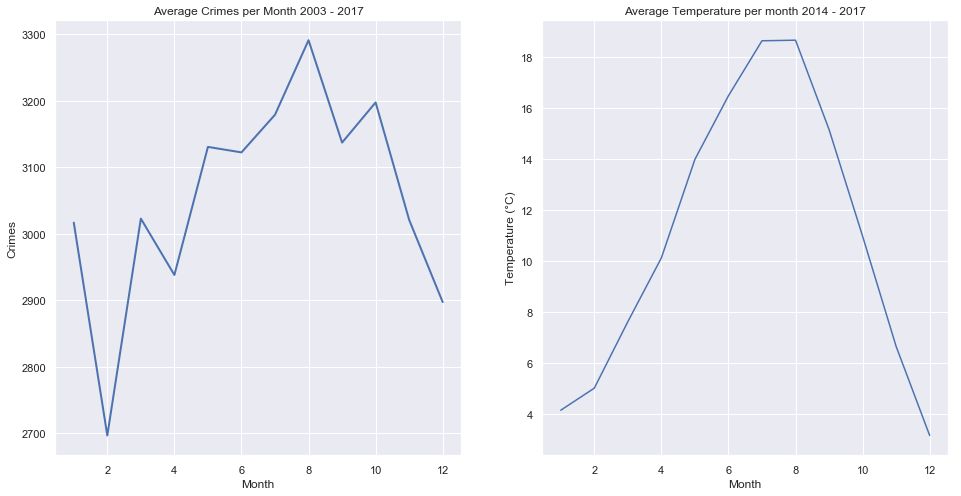

In [6]:
ym = c.groupby(['YEAR', 'MONTH']).count()
ym.reset_index(level = 1, inplace = True)
ym = ym.groupby('MONTH').mean()

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.plot(ym.index, ym['TYPE'], linewidth = 2)
plt.xlabel('Month')
plt.ylabel('Crimes')
plt.title('Average Crimes per Month 2003 - 2017')

plt.subplot(1,2,2)
plt.plot(weather.weather.index, weather.weather['Mean Temp (°C)'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature per month 2014 - 2017')
plt.savefig('Monthly.png')

r = stats.linregress(ym['TYPE'], weather.weather['Mean Temp (°C)']).rvalue
print("Correlation coefficient of average number of crimes and average temperature is: ", r)
print("A {0:0.2f} percent correlation".format(100*r**2))

Correlation coefficient of average number of bike theft and average temperature is:  0.9842137161023213
A 96.87 percent correlation


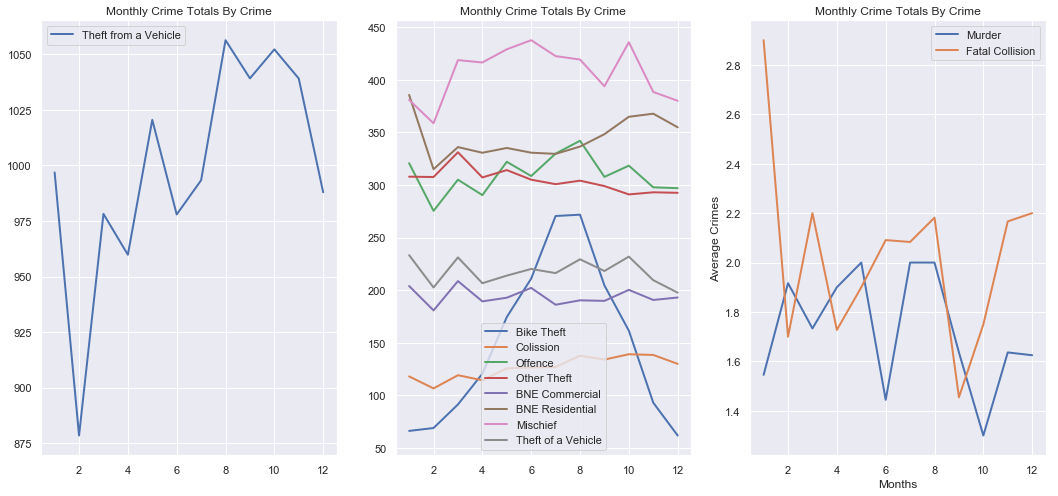

In [7]:
def month(x):
    x = x.groupby(['YEAR','MONTH']).count()
    x.reset_index(level = 1, inplace = True)
    x = x.groupby('MONTH').mean()
    return x
    
# Number of crimes by type per month
b1 = month(bneC)
b2 = month(bneR)
k = month(kill)
m = month(mischief)
o = month(offence)
t1 = month(theftO)
t2 = month(theftFromV)
t3 = month(theftB)
t4 = month(theftV)
c1 = month(injuryCollision)
c2 = month(fatalCollision)

graph('Monthly Crime Totals By Crime', 'Months', 'Average Crimes', 18)
plt.savefig('MonthlyCrimes.png')

r = stats.linregress(t3['TYPE'], weather.weather['Mean Temp (°C)']).rvalue
print("Correlation coefficient of average number of bike theft and average temperature is: ", r)
print("A {0:0.2f} percent correlation".format(100*r**2))

Correlation coefficient of Mischief and commercial break ins is:  0.6139190848091829
A 37.69 percent correlation


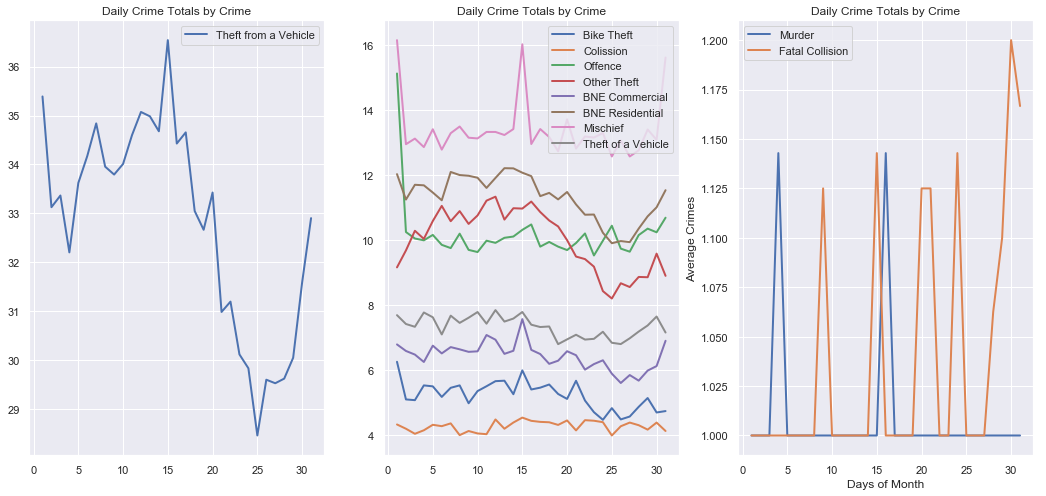

In [8]:
def day(x):
    x = x.groupby(['YEAR','MONTH', 'DAY']).count()
    x.reset_index(level = 1, inplace = True)
    x = x.groupby('DAY').mean()
    return x
    
# Number of crimes by type per month
b1 = day(bneC)
b2 = day(bneR)
k = day(kill)
m = day(mischief)
o = day(offence)
t1 = day(theftO)
t2 = day(theftFromV)
t3 = day(theftB)
t4 = day(theftV)
c1 = day(injuryCollision)
c2 = day(fatalCollision)

graph('Daily Crime Totals by Crime','Days of Month','Average Crimes', 18)
plt.savefig('DailyCrimes.png')

r = stats.linregress(m['TYPE'], b1['TYPE']).rvalue
print("Correlation coefficient of Mischief and commercial break ins is: ", r)
print("A {0:0.2f} percent correlation".format(100*r**2))

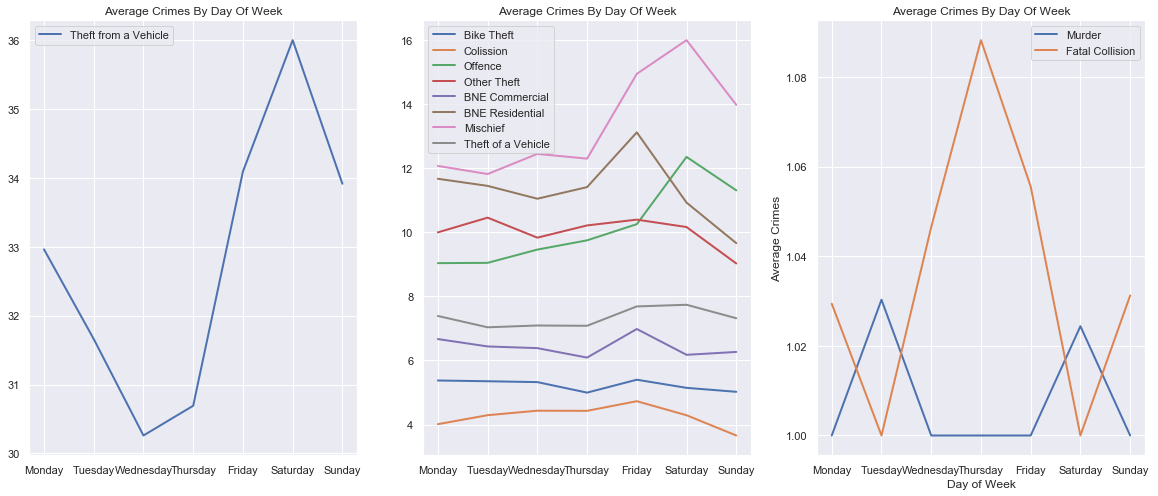

In [14]:
def dayOfWeek(x):
    x = x.groupby(['YEAR', 'MONTH','DAY','day_of_week']).count()
    x.reset_index(level = 1, inplace = True)
    x = x.groupby('day_of_week').mean()
    x['order'] = [5,1,6,7,4,2,3] 
    x = x.sort_values('order')
    return x
    
# Number of crimes by type per month
b1 = dayOfWeek(bneC)
b2 = dayOfWeek(bneR)
k = dayOfWeek(kill)
m = dayOfWeek(mischief)
o = dayOfWeek(offence)
t1 = dayOfWeek(theftO)
t2 = dayOfWeek(theftFromV)
t3 = dayOfWeek(theftB)
t4 = dayOfWeek(theftV)
c1 = dayOfWeek(injuryCollision)
c2 = dayOfWeek(fatalCollision)


graph('Average Crimes By Day Of Week', 'Day of Week','Average Crimes', 20)
plt.savefig('DayOfWeekCrimes.png')


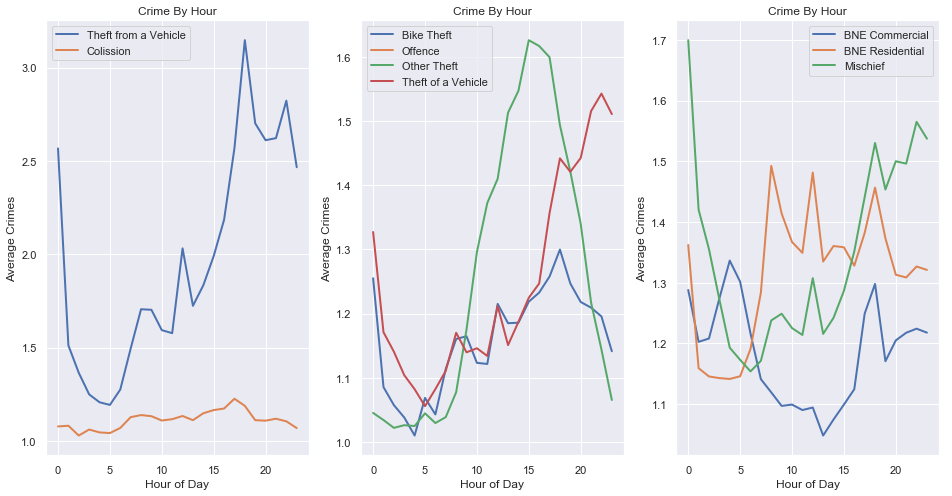

In [10]:
def hour(x):
    x = x.groupby(['YEAR', 'MONTH','DAY','HOUR']).count()
    x.reset_index(level = 1, inplace = True)
    x = x.groupby('HOUR').mean()
    return x

# Number of crimes by type per month
b1 = hour(bneC)
b2 = hour(bneR)
k = hour(kill)
m = hour(mischief)
o = hour(offence)
t1 = hour(theftO)
t2 = hour(theftFromV)
t3 = hour(theftB)
t4 = hour(theftV)
c1 = hour(injuryCollision)
c2 = hour(fatalCollision)

# Plot the crime averages over year by type
plt.figure(figsize=(16, 8))
## Plot Offence, Other Theft, Theft from a vehicle , and Bike Theft together. 
plt.subplot(1,3,1)
plt.plot(t2.index, t2['TYPE'], linewidth = 2)
plt.plot(c1.index, c1['TYPE'], linewidth = 2)
plt.legend(['Theft from a Vehicle','Colission'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Crimes')
plt.title("Crime By Hour")

## Plot the  BNE commercial, BNE residential  
plt.subplot(1,3,2)
plt.plot(t3.index, t3['TYPE'], linewidth = 2)
plt.plot(o.index, o['TYPE'], linewidth = 2)
plt.plot(t1.index, t1['TYPE'], linewidth = 2)
plt.plot(t4.index, t4['TYPE'], linewidth = 2) # 5
plt.legend(['Bike Theft','Offence', 'Other Theft','Theft of a Vehicle'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Crimes')
plt.title("Crime By Hour")

plt.subplot(1,3,3)
plt.plot(b1.index, b1['TYPE'], linewidth = 2) # 3
plt.plot(b2.index, b2['TYPE'], linewidth = 2) # 2
plt.plot(m.index, m['TYPE'], linewidth = 2) # 1
plt.legend(['BNE Commercial', 'BNE Residential', 'Mischief'])
plt.title("Crime By Hour")
plt.xlabel('Hour of Day')
plt.ylabel('Average Crimes')
plt.savefig('HourlyCrimes.png')

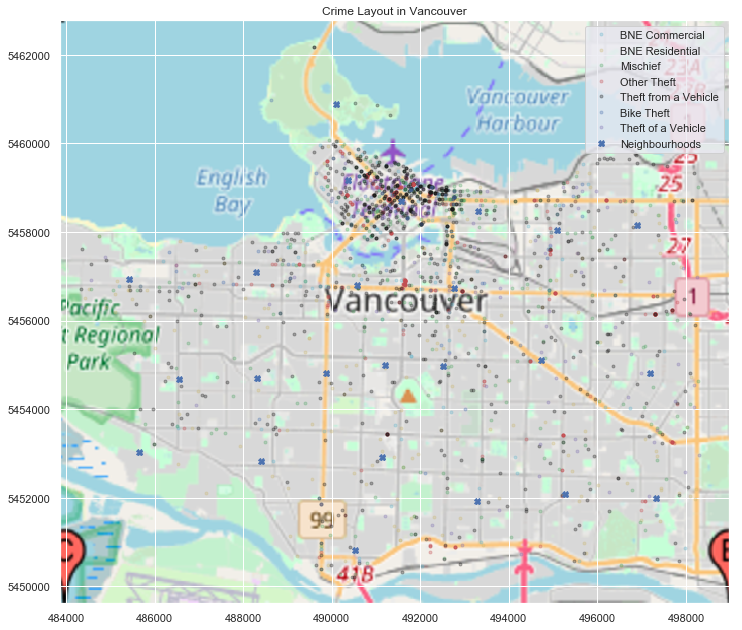

In [11]:
m = 1
y = 2017
bneC17 = bneC[(bneC.YEAR == y) & (bneC.MONTH == m)]
bneR17 = bneR[(bneR.YEAR == y) & (bneR.MONTH == m)]
k17 = kill[(kill.YEAR == y) & (kill.MONTH == m)]
m17 = mischief[(mischief.YEAR == y) & (mischief.MONTH == m)]
o17 = offence[(offence.YEAR == y) & (offence.MONTH == m)]
tO17 = theftO[(theftO.YEAR == y) & (theftO.MONTH == m)]
tv17 = theftFromV[(theftFromV.YEAR == y) & (theftFromV.MONTH == m)]
tb17 = theftB[(theftB.YEAR == y) & (theftB.MONTH == m)]
tv217 = theftV[(theftV.YEAR == y) & (theftV.MONTH == m)]
ic17 = injuryCollision[(injuryCollision.YEAR == y) & (injuryCollision.MONTH == m)]

area = c.groupby('NEIGHBOURHOOD').mean()
area = area[['X','Y']]

img = plt.imread("van.png")
fig, ax = plt.subplots(figsize=(12, 12))

a = .3
ax.plot(bneC17['X'],bneC17['Y'], 'c.', alpha = a)
ax.plot(bneR17['X'],bneR17['Y'], 'y.', alpha = a)
ax.plot(m17['X'],m17['Y'], 'g.', alpha = a)
ax.plot(tO17['X'],tO17['Y'], 'r.', alpha = a)
ax.plot(tv17['X'],tv17['Y'], 'k.', alpha = a)
ax.plot(tb17['X'],tb17['Y'], 'b.', alpha = a)
ax.plot(tv217['X'],tv217['Y'], 'm.', alpha = a)
ax.plot(area['X'], area['Y'], 'bX', alpha = 1)

plt.legend(['BNE Commercial', 'BNE Residential', 'Mischief', 'Other Theft', 'Theft from a Vehicle', 'Bike Theft', 'Theft of a Vehicle', 'Neighbourhoods'])
ax.imshow(img, extent=[483855.7245, 498975.56549999997, 5449616.307, 5462778.313])
plt.title('Crime Layout in Vancouver')
plt.savefig('CrimeMap.png')

#min:  483855.7245 ,  5449616.307  max:  498975.56549999997 ,  5462778.313

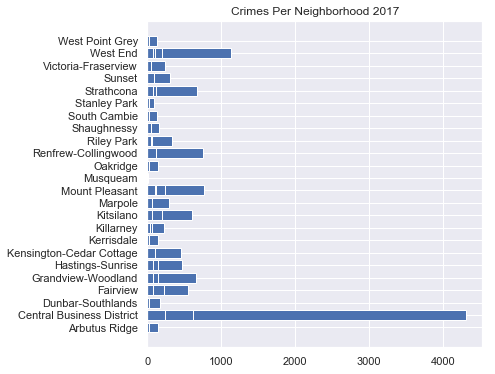

In [12]:
carea = c[(c['YEAR'] == 2017)]
carea = carea.groupby(['NEIGHBOURHOOD', 'TYPE']).count()
carea.index.values
carea = carea['YEAR']
carea = carea.reset_index(level=1)

plt.figure(figsize=(6, 6))
barh(carea.index, carea.YEAR)
plt.title('Crimes Per Neighborhood 2017')
plt.savefig('Neighborhood.png')

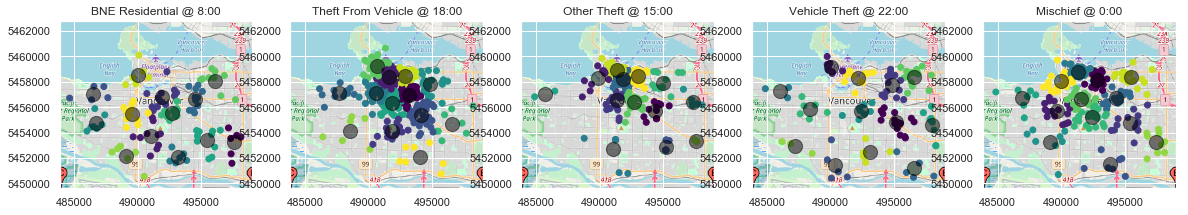

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=13)

# Converts crime data to average area each hour
def hourA(x):
    x = x.groupby(['YEAR', 'MONTH','DAY','HOUR']).mean()
    x.reset_index(level = 3, inplace = True)
    return x

def p(x, c, h):
    y = model.fit_predict(x[['X','Y']])# Change to one of above vars
    plt.scatter(x['X'], x['Y'], c=y, cmap='viridis') # Change to one of above vars 
    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.imshow(img, extent=[483855.7245, 498975.56549999997, 5449616.307, 5462778.313])
    s = c +' @ '+str(int(h))+':00'
    plt.title(s)
    
# Top 5 Most commited crimes per hour @ most frequent crime hour
#############################################################
b2 = hourA(bneR[(bneR['YEAR']==2017)& (bneR['HOUR'] == 8.0)])
t2 = hourA(theftFromV[(theftFromV['YEAR']==2017)& (theftFromV['HOUR'] == 18.0)])
t1 = hourA(theftO[(theftO['YEAR']==2017)& (theftO['HOUR'] == 15.0)])
t4 = hourA(theftV[(theftV['YEAR']==2017)& (theftV['HOUR'] == 22.0)])
m = hourA(mischief[(mischief['YEAR']==2017)& (mischief['HOUR'] == 0.0)])
#############################################################

plt.figure(figsize =(20,20))
plt.subplot(1,5,1)
p(b2, 'BNE Residential', 8.0)
plt.subplot(1,5,2)
p(t2, 'Theft From Vehicle', 18.0)
plt.subplot(1,5,3)
p(t1, 'Other Theft',15.0)
plt.subplot(1,5,4)
p(t4, 'Vehicle Theft', 22.0)
plt.subplot(1,5,5)
p(m, 'Mischief', 0.0)
plt.savefig('Patrol.png')